# HW5 - Heat Capacity of a Solid (Debye's Model)

This program calculates $C_v$, the heat capacity/specific heat for a particular solid (aluminum) using Debye's model.


$C_V = 9V\rho k_B (\frac{T}{\theta_D})^3 \int_0^{\theta_D/T} \frac{x^4e^x}{(e^x-1)^2}dx$



In [98]:
# Ascano, Ronaldo
# due 10.3.18

# Debye's theory of solids regarding heat capacity (specific heat)

# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
#from scipy.integrate import quad
#import math

# declare parameters
avogadro = 6.022 * 10**23            # molecule count
R = 8.314                            # gas constant
k = R / avogadro                     # Boltzmann constant

# declare properties of aluminum
volume = .0001                       # volume of aluminum (in cubic meters)
density = 6.022 * 10**28             # density of aluminum (in cubic meters)
theta_D = 428                        # debye temp for aluminum (in Kelvin)

#T =
#end = theta_D / T
#k = 1.3807 * 10**(-23)

In [99]:
# define the integral part as a function of x
integrand = lambda x: np.exp(x) * x**4 / (np.exp(x)-1)**2

# define the coeffecient part as a function of T
coef = lambda T: 9 * volume * density * k * (T/theta_D)**3

In [251]:
# calculate C_v by multiplying the integral and coefficient to find heat capacity for each T 
# and then append to heatcap_list
# declare the range of inputs (T=5 to T=500)

def plot_Debye_Model(maxT):
    
    T_series = range(5,maxT+1)    
    heatcap_list = []
    
    for T in T_series:
        integral = integrate.quad(integrand,0,theta_D/T)    # integrates the integrand at T
        C_v = coef(T) * integral[0]                         # finds C_v at T
        heatcap_list.append(C_v)                            # add calculated C_v to list
        #print(T, heatcap_list[T-5])

    # display graph
    plt.plot(T_series,heatcap_list, 'r')
    plt.title('$C_v$ as T increases to '+str(maxT)+' K')
    plt.xlabel('Temperature (T in K)')
    plt.ylabel('Heat Capacity ($C_v$ in J/K)')
    
    # resize fig and font size
    plt.rcParams['figure.figsize'] = (20,15)
    plt.rcParams.update({'font.size': 20})
    plt.show

In [250]:
# verify values
print(k)
print('')
print(integral[0])               # access first element in a tuple ~ integral[0]
print('')
print(heatcap_list[:5])
print('')
print(heatcap_list[-5:])

1.3806044503487214e-23

0.20279538063290742

[0.03098842179124131, 0.05354799285526499, 0.08503222939516612, 0.1269285756569244, 0.18072447588651971]

[240.339829860721, 240.3754523589208, 240.41086752506422, 240.44607695004464, 240.4810822096746]


# Debye Model - PLOT

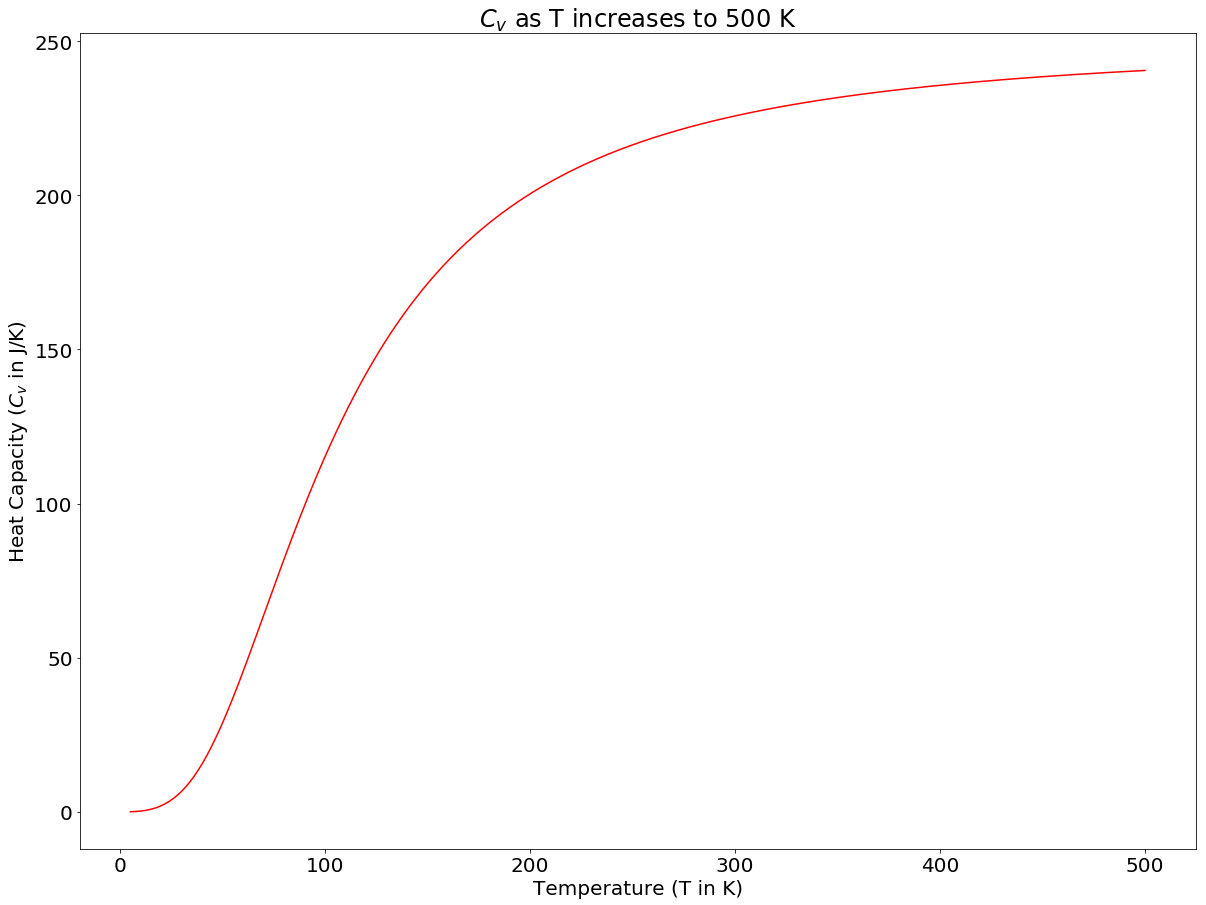

In [252]:
plot_Debye_Model(500)